# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Согласно документации:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
# импорт библиотеки pandas
import pandas as pd

# импорт библиотеки numpy
import numpy as np

# импорт библиотеки seaborn
import seaborn as sns

# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

In [2]:
# чтение и запись данных в переменную data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option("display.max_columns", 22)

In [3]:
# вывод перых пяти сторок таблицы для ознакомления с данными
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# получение информации методом info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица состоит из <b>23699</b> сторок.<br><br>
В следующих столбцах имеются пропуски в значениях:
* `ceiling_height`
* `floors_total`
* `living_area`
* `is_apartment`
* `kitchen_area`
* `balcony`
* `locality_name` 
* `airports_nearest`
* `cityCenters_nearest`
* `parks_around3000`
* `parks_nearest`
* `ponds_around3000`
* `ponds_nearest`
* `days_exposition` <br>
Неправильный тип данных у `is_apartment` согласно документации должен быть тип данных bool, а в табилце object. <br>
Неправильный тип данных у `first_day_exposition` должен быть datetime а в табилце object.

In [5]:
# получение информации методом describe 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В данных есть аномалии: 
1. В столбце `ceiling_height` минимальная высота потолков 1 метр, а максимальная высота потолков 100 метров.
2. В столбце `living_area` минимальная жилая площадь 2 метра.
3. В столбце `kitchen_area` минимальная площадь кухни 1.3 метра.
4. В столбце `airports_nearest` минимальное расстояние до аэропорта 0 метров.

### Вывод

Данные имеют большое количество пропусков и аномалий. <br>
Для даленейшей работы с данными необходимо заполнить пропуски в значениях и разобраться с аномалиями.

## Предобработка данных

### Обработка пропусков а значениях

#### Высота потолков

In [6]:
# Получение количества пропусов значений в столбце ceiling_height
'Пропусков в значениях высоты потолков: {:.1%}'. format(data['ceiling_height'].isna().value_counts()[1] / len(data))

'Пропусков в значениях высоты потолков: 38.8%'

In [7]:
# Создание сводной таблицы с медианными значениями высоты потолков по этажности домов и их частотой для того, чотбы пройтись
# по данной таблице циклом for и заполнить пропуски в значениях
celling_height_median = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
celling_height_median.columns = ['median', 'count']

# Заполнение пропусков в значениях медианным значением высоты потолка в зависимости от этажности дома
for floor in celling_height_median.index:
    data.loc[
        (data['ceiling_height'].isna()) & (data['floors_total'] == floor),
        'ceiling_height'] = celling_height_median.loc[floor, 'median']

#### Этажность

In [8]:
'Пропусков в значениях количества этажей в доме: {:.1%}'. format(data['floors_total'].isna().value_counts()[1] / len(data))

'Пропусков в значениях количества этажей в доме: 0.4%'

Пропусков всего 0.4%. можно удалить пропущенные значения

In [9]:
data.dropna(subset=['floors_total'], inplace=True)

#### Жилая площадь

Исходя из норм СанПин площадь жилого помещения (комнаты) в однокомнатной квартире — 14 м2, общего жилого помещения в квартирах с числом комнат две и более — 16 м2, кухни — 8 м2.<br>
Заполним пропущенные значения минимальными требованиями СанПин.

In [10]:
'Пропусков в значениях жилой площади: {:.1%}'. format(data['living_area'].isna().value_counts()[1] / len(data))

'Пропусков в значениях жилой площади: 7.9%'

In [11]:
# Функция заполняет значение площади минимльным по СанПин
def living_area_min(values):
    if values["rooms"] < 2 and  values['living_area'] < 14:
        values['total_area'] += 14 - values['living_area']
        values['living_area']  = 14
    elif values["rooms"] > 1 and values['living_area'] < 16:
        values['total_area'] += 16 - values['living_area']
        values['living_area']  = 16
    return values

In [12]:
# Применение функции living_area_min к данным столбца living_area
data['living_area'] = data.apply(living_area_min, axis = 1)

In [13]:
# Проверка обработки пропущенных значений
data['living_area'].isna().sum()

0

#### Площадь кухни

In [14]:
'Пропусков в значениях площади кухни: {:.1%}'. format(data['kitchen_area'].isna().value_counts()[1] / len(data))

'Пропусков в значениях площади кухни: 9.4%'

In [15]:
# Замена пропущенных значений площади кухнини в квартирах-студиях на 0
data['kitchen_area'] = data['kitchen_area'].where(~data['kitchen_area'].isnull(), 0)

# Проверка обработки пропущенных значений
data['kitchen_area'].isna().sum()

0

#### Колчество балконов

Будем считать, что отсутствие информации о количестве балконов говорит о том, что балконов в квартире нет.

In [16]:
'Пропусков в значениях количества балконов: {:.1%}'. format(data['balcony'].isna().value_counts()[1] / len(data))

'Пропусков в значениях количества балконов: 48.6%'

In [17]:
# Замена пропущенных значений на 0
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum()

0

#### Название населенного пункта

In [18]:
'Пропусков в значениях названия населенного пункта: {:.1%}'. format(data['locality_name'].isna().value_counts()[1] / len(data))

'Пропусков в значениях названия населенного пункта: 0.2%'

Пропусков в названии населенного пункта всего 0.2%. Заполним пропущенные значения заглушкой.

In [19]:
# Заполнение пропусков в названии населенного пункта заглушкой 'unknown'
data.loc[data['locality_name'].isna(), 'locality_name'] = 'unknown'

#### Расстояние до центра города

In [20]:
'Пропусков в значениях расстояния до центра города: {:.1%}'. format(data['cityCenters_nearest'].isna().value_counts()[1] / len(data))

'Пропусков в значениях расстояния до центра города: 23.3%'

Так как данные полчучены автоматичести и нет возможности получить более точные данные оставим их без изменения

#### Апартаменты

Будем считать, что отсутствие информации говорит о том, что это не апартаменты.

In [21]:
'Пропусков в значениях апартаментов: {:.1%}'. format(data['is_apartment'].isna().value_counts()[1] / len(data))

'Пропусков в значениях апартаментов: 88.2%'

In [22]:
data['is_apartment'] = data['is_apartment'].where(~data['is_apartment'].isnull(), False)

#### Расстояние до ближайшего аэропорта

In [23]:
'Пропусков в значениях расстояние до ближайшего аэропорта: {:.1%}'. format(data['airports_nearest'].isna().value_counts()[1] / len(data))

'Пропусков в значениях расстояние до ближайшего аэропорта: 23.4%'

Так как данные полчучены автоматичести и нет возможности получить более точные данные оставим их без изменения

#### Число парков в радиусе 3 км

In [24]:
'Пропусков в значениях число парков в радиусе 3 км: {:.1%}'. format(data['parks_around3000'].isna().value_counts()[1] / len(data))

'Пропусков в значениях число парков в радиусе 3 км: 23.3%'

Так как данные полчучены автоматичести и нет возможности получить более точные данные оставим их без изменения

#### Расстояние до ближайшего парка

In [25]:
'Пропусков в значениях расстояние до ближайшего парка: {:.1%}'. format(data['parks_nearest'].isna().value_counts()[1] / len(data))

'Пропусков в значениях расстояние до ближайшего парка: 65.9%'

Так как данные полчучены автоматичести и нет возможности получить более точные данные оставим их без изменения

#### Число водоемов в радиусе 3 км

In [26]:
'Пропусков в значениях  число водоемов в радиусе 3 км: {:.1%}'. format(data['ponds_around3000'].isna().value_counts()[1] / len(data))

'Пропусков в значениях  число водоемов в радиусе 3 км: 23.3%'

Так как данные полчучены автоматичести и нет возможности получить более точные данные оставим их без изменения

#### Расстояние до ближайшего водоема

In [27]:
'Пропусков в значениях расстояние до ближайшего водоема: {:.1%}'. format(data['ponds_nearest'].isna().value_counts()[1] / len(data))

'Пропусков в значениях расстояние до ближайшего водоема: 61.6%'

Так как данные полчучены автоматичести и нет возможности получить более точные данные оставим их без изменения

#### Длительность размещения объявления (от публикации до снятия)

In [28]:
'Пропусков в значениях длительость размещения объявления: {:.1%}'. format(data['days_exposition'].isna().value_counts()[1] / len(data))

'Пропусков в значениях длительость размещения объявления: 13.4%'

### Замена типов данных

In [29]:
# Замена типов данных
data['is_apartment'] = data['is_apartment'].astype('bool')
data['living_area'] = data['living_area'].astype('int')

In [30]:
# Замена типа данных по дате публикации с object на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [31]:
# Проверка на наличие дубликатов данных
data.duplicated().sum()

0

<h3> Вывод: </h3>
Была произведенеа предобработка данных.<br>
1. При заполнении пропущенных значений высоты потолков медианным значением исходя из этажности дома. <br>
2. При заполнеии прорущенных значений жилой площади были использованы тебования СанПин для жилых помещений, и заполнены минимальными требованиями <br>
3. При заполнеии прорущенных значений количества балконов пропуски были интерпритированы как отсутствие балконов.<br>
4. При заполнеии прорущенных значений апартаментов пропуски были интерпритированы, что эот не аппартаменты.
5. При заполнеии прорущенных значений названия населеного пункта, пропуски были заполнены заглушкой.
6. При заполнеии прорущенных значений полученнызх автоматически данные были оставленны без изменеий.
7. Была произведена замена типов данных.
8. была произведена проверка на наличие дуликатов.

## Расчёты и добавление результатов в таблицу

### Добавление цены за квадратный метр

In [32]:
# Добавление цены за квадратный метр
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 1)

###  Добавление деня недели, месяца и года публикации объявления

In [33]:
# Добавление деня недели, месяца и года публикации объявления
data['day'] = data['first_day_exposition'].dt.day
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

### Добавление этажа кватриры

In [34]:
# Добавление этажа кватриры
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

### Добавление соотношения жилой площади к общей

In [35]:
# Добавление соотношения жилой площади к общей
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)

### Добавление соотношения площади кухни к общей

In [36]:
# Добавление соотношения площади кухни к общей
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков.

In [37]:
# Функция определяющая границы интерквартиотильного размаха
def IQR(values):
    
    # первый и третий квантиль
    Q1 = round(values.quantile(.25), 2)
    Q3 = round(values.quantile(.75), 2)
    
    # интерквартильный размах
    iqr = Q3 - Q1
    
    # левая и правая граница интерквартильного размаха  
    left_border_iqr = round(Q1 - 1.5 * iqr, 2)
    right_border_iqr = round(Q3 + 1.5 * iqr, 2)
    
    # левая граница не должена быть меньше минимального значения
    if left_border_iqr < values.min():
        left_border_iqr = values.min() 
        
    return [left_border_iqr, right_border_iqr]

#### Площадь

In [38]:
# Расчет границ интерквартильного размаха
IQR(data['total_area'])

[12.0, 114.5]

(0.0, 120.0)

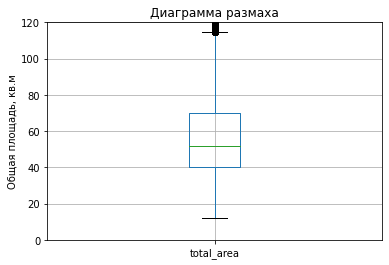

In [39]:
# Построене графика интерквартильного размаха
data.boxplot(column='total_area')
plt.title('Диаграмма размаха')
plt.ylabel('Общая площадь, кв.м')
plt.ylim(0, 120)

Text(0, 0.5, 'Частота')

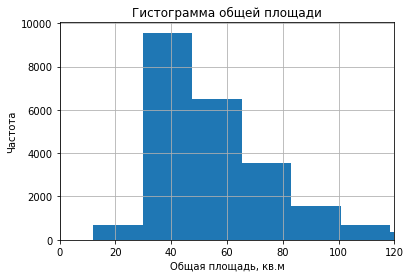

In [40]:
# Построение гистограммы
data['total_area'].hist(bins=50)
plt.xlim(0, 120)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')

In [41]:
# Вычисление процента аномальных значений
'Аномальные значения составляют {:.1%}'. format(len(data.loc[data['total_area'] > IQR(data['total_area'])[1]]) / len(data)) + ' от общей выборки'

'Аномальные значения составляют 5.2% от общей выборки'

<h5><b>Вывод:</b> </h5> Наиболее часто встречающаяся площадь квартиры находится в области около 35-45 метров

#### Цена

In [42]:
# Расчет границ интерквартильного размаха
IQR(data['last_price'])

[12190.0, 11897500.0]

(-500000.0, 12500000.0)

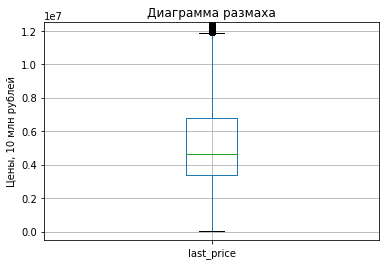

In [43]:
# Построене графика интерквартильного размаха
data.boxplot(column='last_price')
plt.title('Диаграмма размаха')
plt.ylabel('Цены, 10 млн рублей')
plt.ylim(-500000, 12500000)

Text(0, 0.5, 'Частота')

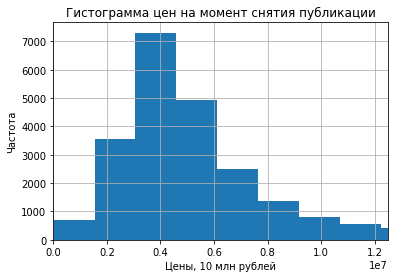

In [44]:
# Построение гистограммы
data['last_price'].hist(bins=500)
plt.xlim(0, 12500000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
plt.ylabel('Частота')

In [45]:
# вычисление процента аномальных значений
'Аномальные значения составляют {:.1%}'. format(len(data.loc[data['last_price'] > IQR(data['last_price'])[1]]) / len(data)) + ' от общей выборки'

'Аномальные значения составляют 8.7% от общей выборки'

<h5><b>Вывод:</b> </h5>Распределение похоже на нормальное. Наиболее часто встречающийся диапазон цены: от 3 до 6 миллионов рублей.

#### Колисество комнат

In [46]:
# Расчет границ интерквартильного размаха
IQR(data['rooms'])

[0, 6.0]

(-1.0, 7.0)

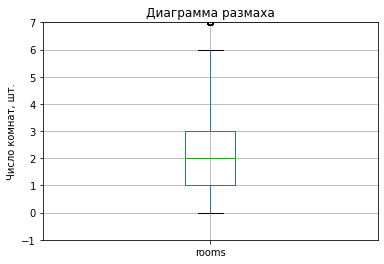

In [47]:
# Построене графика интерквартильного размаха
data.boxplot(column='rooms')
plt.title('Диаграмма размаха')
plt.ylabel('Число комнат, шт.')
plt.ylim(-1, 7)

Text(0, 0.5, 'Частота')

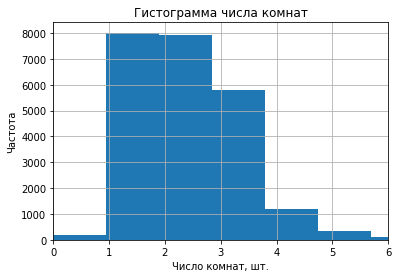

In [48]:
# Построение гистограммы
data['rooms'].hist(bins=20)
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Частота')

In [49]:
# вычисление процента аномальных значений
'Аномальные значения составляют {:.1%}'. format(len(data.loc[data['rooms'] > IQR(data['rooms'])[1]]) / len(data)) + ' от общей выборки'

'Аномальные значения составляют 0.4% от общей выборки'

<h5><b>Вывод:</b> </h5>Больше всего продается одно- и двухкомнатных крартир.

#### Высота потолков

In [50]:
# Расчет границ интерквартильного размаха
IQR(data['ceiling_height'])

[2.25, 3.05]

(2.0, 3.2)

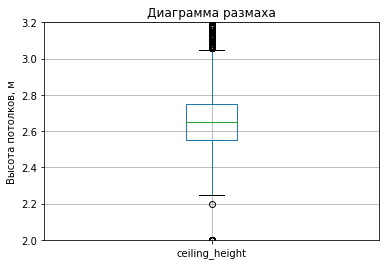

In [51]:
# Построене графика интерквартильного размаха
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха')
plt.ylabel('Высота потолков, м')
plt.ylim(2, 3.2)

Text(0, 0.5, 'Частота')

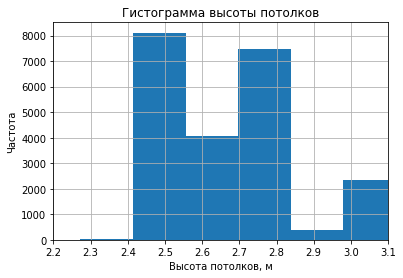

In [52]:
# Построение гистограммы
data['ceiling_height'].hist(bins=700)
plt.xlim(2.2, 3.1)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')

In [53]:
# вычисление процента аномальных значений
'Аномальные значения составляют {:.1%}'. format(len(data.loc[data['ceiling_height'] > IQR(data['ceiling_height'])[1]]) / len(data)) + ' от общей выборки'

'Аномальные значения составляют 6.2% от общей выборки'

<h5><b>Вывод:</b> </h5>Большинство квартир имеют потолки от 2,5 до 2.8 метров, но так же часто встречаются объекты с потолками больше 3.0 метров

#### Время продажи квартиры

In [54]:
# Расчет границ межквартильного размаха
IQR(data['days_exposition'])

[1.0, 512.5]

(-20.0, 550.0)

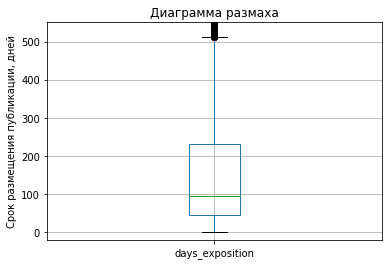

In [55]:
# Построене графика интерквартильного размаха
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха')
plt.ylabel('Срок размещения публикации, дней')
plt.ylim(-20, 550)

(0.0, 550.0)

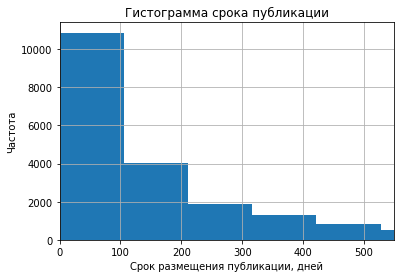

In [56]:
# Построение гистограммы
data['days_exposition'].hist(bins=15)
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
plt.ylabel('Частота')
plt.xlim(0, 550)

In [57]:
# вычисление процента аномальных значений
'Аномальные значения составляют {:.1%}'. format(len(data.loc[data['days_exposition'] > IQR(data['days_exposition'])[1]]) / len(data)) + ' от общей выборки'

'Аномальные значения составляют 7.0% от общей выборки'

In [58]:
# Расчет медианого времени продажи недвижимости
data['days_exposition'].median()

95.0

In [59]:
# Расчет среднего времени продажи нежвижимости
data['days_exposition'].mean()

180.88483929357665

<h5><b>Вывод:</b> </h5>
Медианное значение продажи нежвижимости составляет 95 дней. А среднее в два раза больше и составляет 181 день.

#### Удаление редких и выбивающихся значений

In [61]:
# Код ревьюера

low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Нижняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1000000.0
Нижняя граница last_price 36000000.0
Процент отброшенных значений =  1.95 %


In [62]:
# Отюрасываем значения last_price

low_percentele = 0.01
hihg_percentele = 0.99

param_low = data['last_price'].quantile(low_percentele)
param_high = data['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@param_low <= last_price <= @param_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

good_data = data.query('@param_low <= last_price <= @param_high').reset_index(drop=True)

Нижняя граница: 1000000.0
Верхняя граница: 36000000.0
Процент отброшенных значений =  1.95 %


In [63]:
# Отюрасываем значения total_area

low_percentele = 0.01
hihg_percentele = 0.99

param_low = data['total_area'].quantile(low_percentele)
param_high = data['total_area'].quantile(hihg_percentele)

print(f'Нижняя граница: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@param_low <= total_area <= @param_high'))
        / len(data['total_area']) * 100,
        2
    ),
    '%'
)

good_data = data.query('@param_low <= total_area <= @param_high').reset_index(drop=True)

Нижняя граница: 25.333599999999997
Верхняя граница: 197.1760000000002
Процент отброшенных значений =  2.01 %


In [64]:
# Отюрасываем значения rooms

low_percentele = 0.01
hihg_percentele = 0.99

param_low = data['rooms'].quantile(low_percentele)
param_high = data['rooms'].quantile(hihg_percentele)

print(f'Нижняя граница: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@param_low <= rooms <= @param_high'))
        / len(data['rooms']) * 100,
        2
    ),
    '%'
)

good_data = data.query('@param_low <= rooms <= @param_high').reset_index(drop=True)

Нижняя граница: 1.0
Верхняя граница: 5.0
Процент отброшенных значений =  1.64 %


In [65]:
# Отюрасываем значения ceiling_height

low_percentele = 0.01
hihg_percentele = 0.99

param_low = data['ceiling_height'].quantile(low_percentele)
param_high = data['ceiling_height'].quantile(hihg_percentele)

print(f'Нижняя границa: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@param_low <= ceiling_height <= @param_high'))
        / len(data['ceiling_height']) * 100,
        2
    ),
    '%'
)

good_data = data.query('@param_low <= ceiling_height <= @param_high').reset_index(drop=True)

Нижняя границa: 2.5
Верхняя граница: 3.6
Процент отброшенных значений =  1.27 %


In [66]:
# Отюрасываем значения days_exposition

low_percentele = 0.0001
hihg_percentele = 0.9999

param_low = data['days_exposition'].quantile(low_percentele)
param_high = data['days_exposition'].quantile(hihg_percentele)

print(f'Нижняя границa: {param_low}')
print(f'Верхняя граница: {param_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@param_low <= days_exposition <= @param_high'))
        / len(data['days_exposition']) * 100,
        2
    ),
    '%'
)

good_data = data.query('@param_low <= days_exposition <= @param_high').reset_index(drop=True)

Нижняя границa: 2.0
Верхняя граница: 1551.2399999999327
Процент отброшенных значений =  13.45 %


In [67]:
print('Доля чистых значений составила: {:.1%}'. format(len(good_data) / len(data)))

Доля чистых значений составила: 86.5%


### Факторы, влияющие на стоимость квартиры

#### Зависит ли цена от площади, числа комнат, удалённости от центра

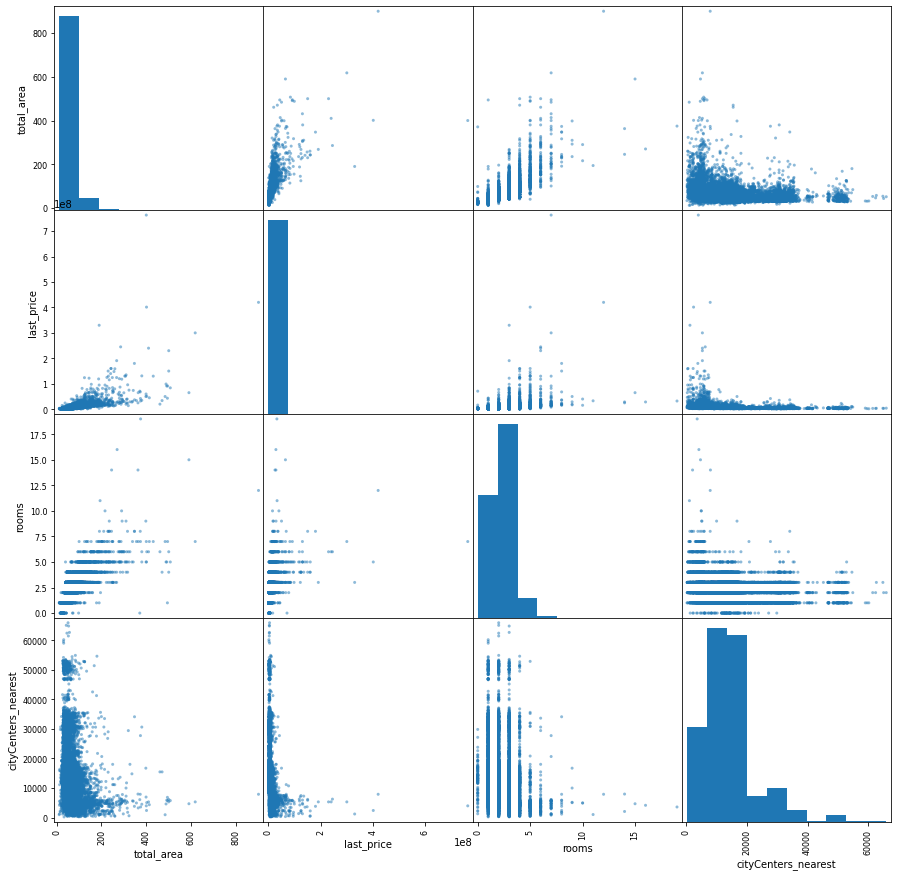

In [68]:
# Построение матрицы рассеяния
pd.plotting.scatter_matrix(good_data[['total_area', 'last_price', 'rooms', 'cityCenters_nearest']],figsize=(15, 15))
None

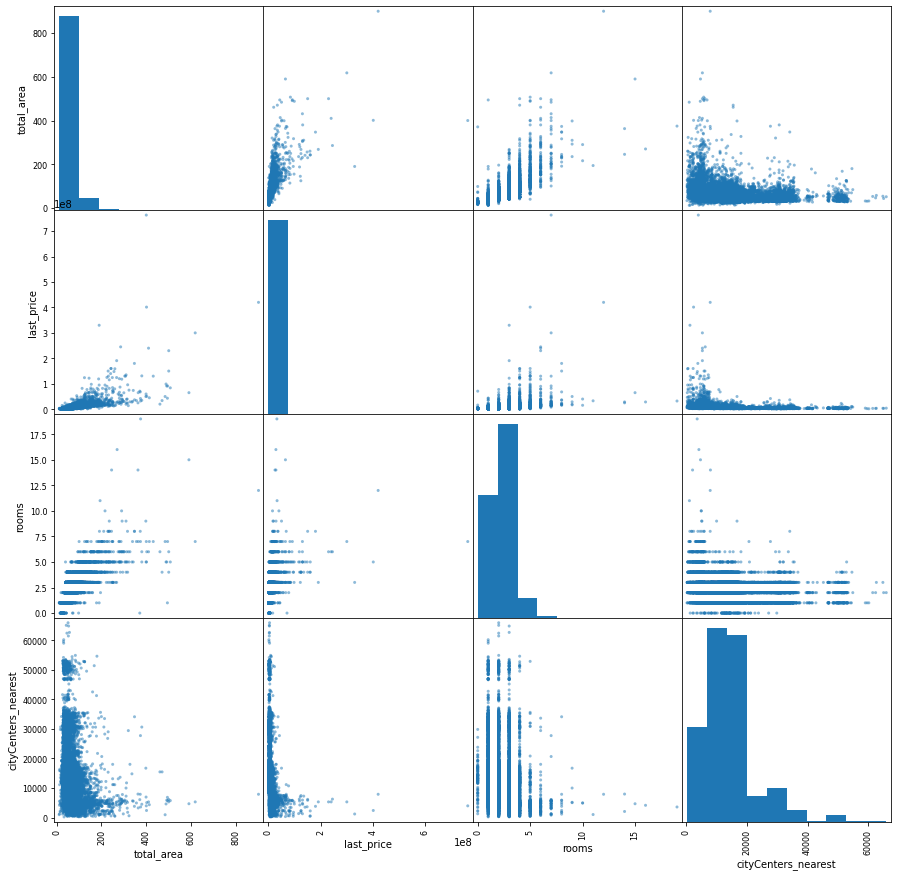

In [69]:
# Код ревьюера

pd.plotting.scatter_matrix(good_data[['total_area', 'last_price', 'rooms', 'cityCenters_nearest']],figsize=(15, 15))
None

In [70]:
# Расчет коэфициента корреляции Пирсона
good_data[['last_price', 'total_area','rooms','cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.643057,0.353791,-0.192692
total_area,0.643057,1.000000,0.759472,-0.224944
rooms,0.353791,0.759472,1.000000,-0.181489
cityCenters_nearest,-0.192692,-0.224944,-0.181489,1.000000


<h5><b>Вывод:</b> </h5> Больше всего цена зависит от общей площади, а не от количества комнат. С ростом растояния до центра цена уменьшается.

#### Зависимость цены от этажа

In [71]:
# функция строит столбчатую диаграмму по медианному значению, по двум столбцам поданным на вход
def ratio_hist_median_bar(data, column1, column2):
    
    data.pivot_table(
        index = column1, 
        values = column2,
        aggfunc = 'median'
    ).plot(
        y = column2, 
        kind = 'bar', 
        figsize = (15,5))

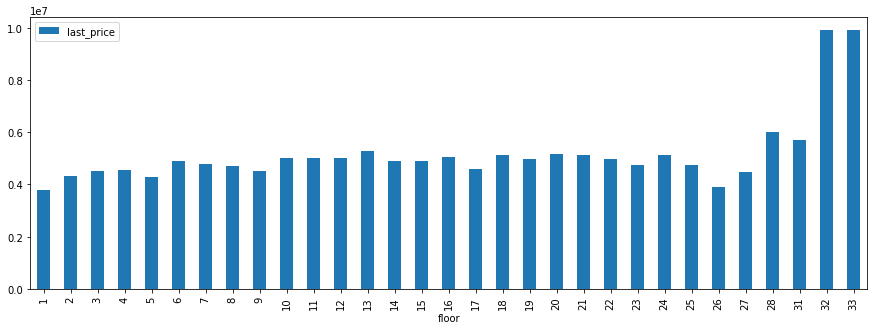

In [72]:
# Построение столбчатой диаграммы по этажности
ratio_hist_median_bar(good_data, 'floor', 'last_price')

<h5><b>Вывод:</b> </h5>На последних двух этажах медианная стоимость недвижимости выше.

####  Зависимость от даты размещения

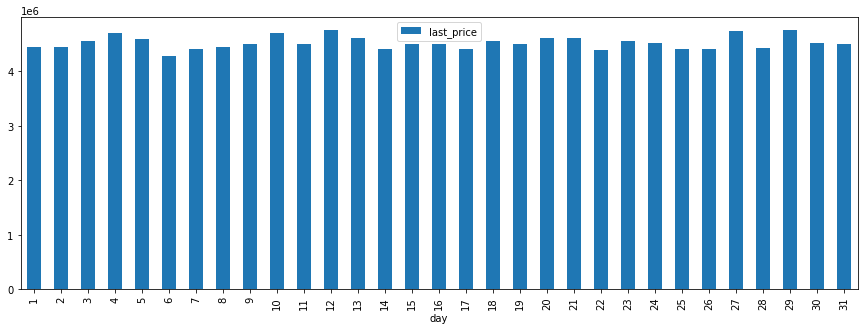

In [73]:
ratio_hist_median_bar(good_data, 'day', 'last_price')

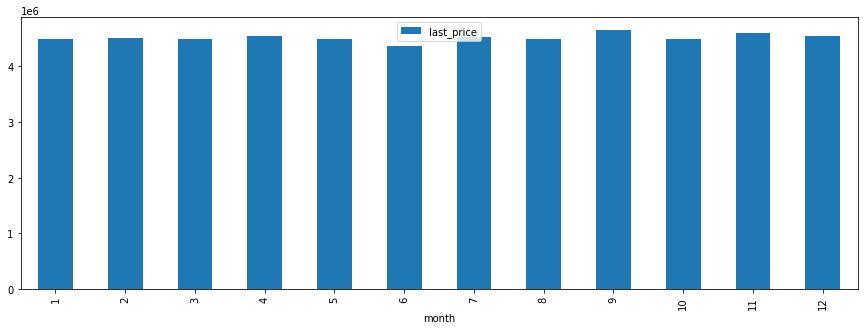

In [74]:
# Построение столбчатой диаграммы по месяцу прожажи
ratio_hist_median_bar(good_data, 'month', 'last_price')

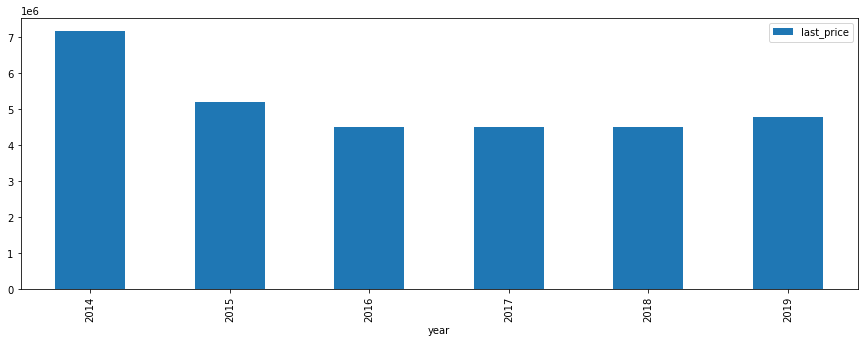

In [75]:
# Построение столбчатой диаграммы по году прожажи
ratio_hist_median_bar(good_data, 'year', 'last_price')

<h5><b>Вывод:</b> </h5>Цена не зависит от даты размещения

### Расположение

In [76]:
# Десять населённых пунктов с наибольшим числом объявлений
locality_name = (data
                 .pivot_table(index = 'locality_name',
                              values = ['price_per_sqm'],
                              aggfunc = ['count','mean'])
                ).droplevel(
                            level=0, 
                            axis=1)
                 
locality_name.columns = ['count','mean']
locality_name.sort_values(by = "count", inplace = True, ascending = False)
locality_name[:10]

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877484
посёлок Мурино,520,85673.259231
посёлок Шушары,439,78551.343964
Всеволожск,398,68654.475628
Пушкин,369,103125.818157
Колпино,338,75424.581953
посёлок Парголово,327,90175.915291
Гатчина,307,68746.147231
деревня Кудрово,299,92473.546488


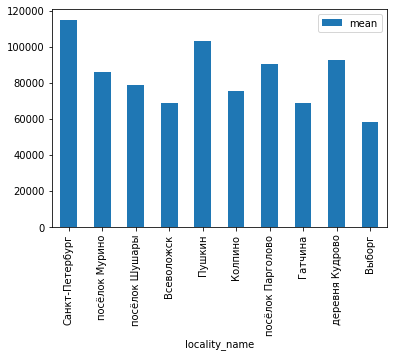

In [77]:
locality_name[:10].plot(y='mean', kind='bar')
None

In [78]:
# Добавление столбца с расстоянием от центра в килотетрах
data['cityCenters_nearest_km'] = round((data['cityCenters_nearest'] // 1000))

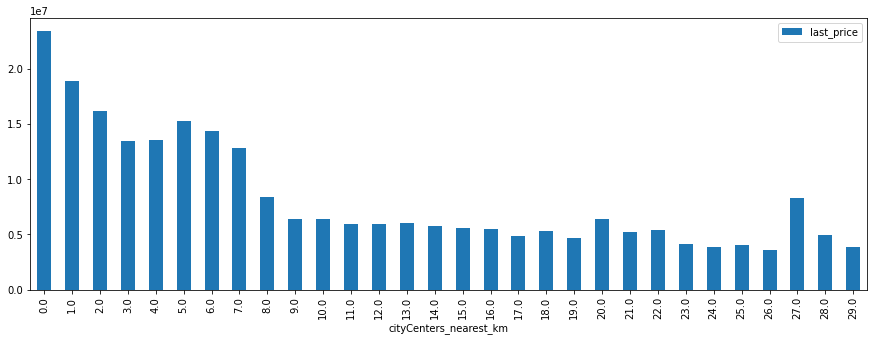

In [79]:
# Построение гистограммы зависимости стоимости квартиры от расстояния от центра
data_spb = data.query('locality_name == "Санкт-Петербург"')
cityCenters_nearest_km_spb = data_spb.pivot_table(index ='cityCenters_nearest_km',
                                                        values = 'last_price',aggfunc = 'mean')
cityCenters_nearest_km_spb.plot(y = 'last_price',kind = 'bar',figsize = (15,5))
None

Гистограмма показыает, спад цены после 7 километров, можно предположить, что центром считается радиус 7 километров

#### Поиск корреляции для недвижимости в центре Санкт-Петербурга

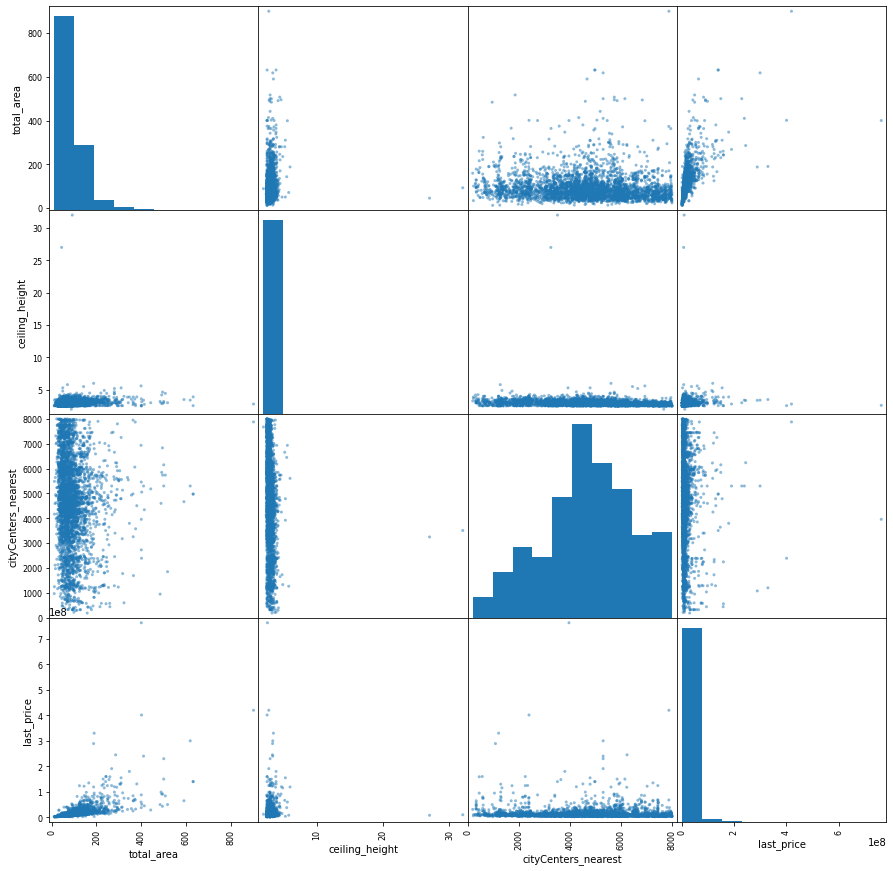

In [80]:
# Построение матрицы рассеяния
сenter_spb =  data_spb.query('cityCenters_nearest_km <= 7')
pd.plotting.scatter_matrix(сenter_spb[['total_area',
                                          'ceiling_height', 
                                          'cityCenters_nearest',
                                          'first_day_exposition',
                                          'last_price']],figsize=(15,15))
None

In [81]:
сenter_spb[['rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition', 'last_price']].corr()

,rooms,floor,cityCenters_nearest,last_price
rooms,1.000000,-0.038983,-0.176549,0.333293
floor,-0.038983,1.000000,0.250439,0.125709
cityCenters_nearest,-0.176549,0.250439,1.000000,-0.048395
last_price,0.333293,0.125709,-0.048395,1.000000


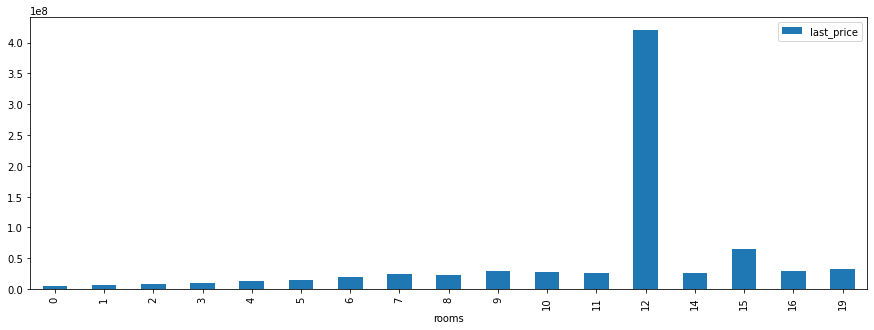

In [82]:
ratio_hist_median_bar(сenter_spb, 'rooms', 'last_price')

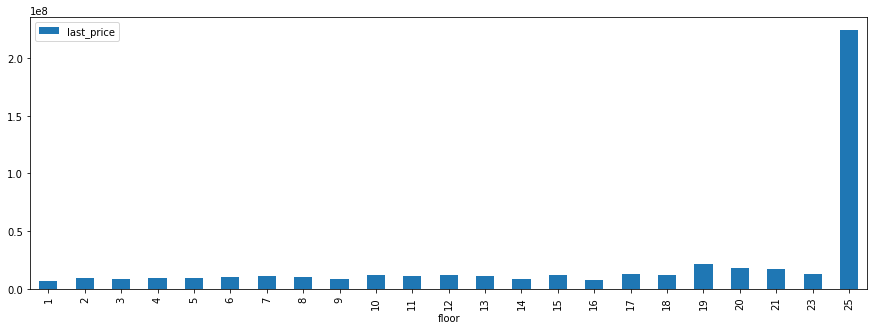

In [83]:
ratio_hist_median_bar(сenter_spb, 'floor', 'last_price')

<h5><b>Вывод:</b> </h5>
В центре Санкт-Петербурга наибольшее влияние на стоимость квартиры оказывает количество комнат. Самая высокая медианная стоимость 12 комтаных квартир. Также самая дорогая недвижимость с центре Санкт-Петербурга расположена на 25 этаже.

## Общий вывод

При первоначальном рассмотрении данных было обнаружено большое количество пропусков и аномалий в данных.<br>
Для даьлнейцего анализа была выполнена предобработка данных в ходе которой были заполнены пропуски в значениях, заменены типы данных и выполнена проверка на наличие будликатов в данных.<br>
При заполнении пропущенных значений:
1. высоты потолков медианным значением исходя из этажности дома. <br>
2. жилой площади были использованы тебования СанПин для жилых помещений, и заполнены минимальными требованиями <br>
3. количества балконов пропуски были интерпритированы как отсутствие балконов.<br>
4. апартаментов пропуски были интерпритированы, что эот не аппартаменты.

В ходе исследовательского анализа:<br>
1. Были изучены следующие параметры: 
    1. площадь - наиболее часто встречающаяся площадь квартиры находится в области около 35-45 метров;
    2. цена - наиболее часто встречающийся диапазон цен: от 3 до 6 миллионов рублей;
    3. число комнат - больше всего продается одно- и двухкомнатных крартир;
    4. высота потолков - Большинство квартир имеют потолки от 2,5 до 2.8 метров, но так же часто встречаются объекты с потолками больше 3.0 метров. 

2. Было изучено время продажи квартиры и установлено, что медианное время продажи квартиры 95 дней, а среднее в два раза больше и составляет 181 день.

3. Были убраны редкие и выбываюшиеся значения, после чего доля "чистых" данных составила 86.5%

4. Было изучено какие факторы больше всего влияют на стоимость квартиры.<br>
Больше всего цена зависит от общей площади, а не от количества комнат. С ростом растояния до центра цена уменьшается.

5. Было выбрано 10 населённых пунктов с наибольшим числом объявлений и посчитана средняя цена квадратного метра в этих населённых пунктах. Было выделено, что самая дорогая недвижимость в населенных пунктах:
    1. Санкт-Петербург	
    2. посёлок Мурино
    3. посёлок Шушары
    4. Всеволожск
    5. Пушкин	
    6. Колпино	
    7. посёлок Парголово
    8. Гатчина	
    9. деревня Кудрово	
    10. Выборг

6. Было изучено расстояие центра Санкт-Петербурга и установлено, что центром является радиус 7 кмлометров.

7. Был выделен сегмент квартир в центре. И изучены какие параметры сильнее всего влияют на стоимость недвижимости.<br>
В центре Санкт-Петербурга наибольшее влияние на стоимость квартиры оказывает количество комнат. Самая высокая медианная стоимость 12 комтаных квартир. Также самая дорогая недвижимость с центре Санкт-Петербурга расположена на 25 этаже.